# Sep 3, 2023: mouse whole brain fMRI: ICA

In [1]:
import numpy as np
import pandas as pd
import scipy as sp 
import pickle 
from sklearn.decomposition import FastICA

# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow

plt.rcParamsDefault['font.family'] = "sans-serif"
plt.rcParamsDefault['font.sans-serif'] = "Arial"
plt.rcParams['font.size'] = 14
plt.rcParams["errorbar.capsize"] = 0.5

import cmasher as cmr  # CITE ITS PAPER IN YOUR MANUSCRIPT

In [2]:
class ARGS():
    pass

args = ARGS()

In [3]:
data_path = f"/home/govindas/mouse_dataset/data"
data_file = f"{data_path}/sub-SLC05_ses-1_run-7_task-rest_space-CCF3d_desc-rabies-hp_bold.npy"
ts = np.load(data_file).T # time x rois
display(ts.shape)

args.TR = 1
t = np.arange(0, ts.shape[0]*args.TR, args.TR)
t.shape

(474, 6017)

(474,)

In [4]:
ts = ts[:, ~np.isnan(ts).any(axis=0)]
ts.shape

(474, 5753)

In [5]:
# ts = ts.T

In [6]:
ica = FastICA(
    n_components=7,
    whiten='unit-variance',
    max_iter=100000,
)
S_ = ica.fit_transform(ts)
A_ = ica.mixing_
S_.shape, A_.shape

((474, 7), (5753, 7))

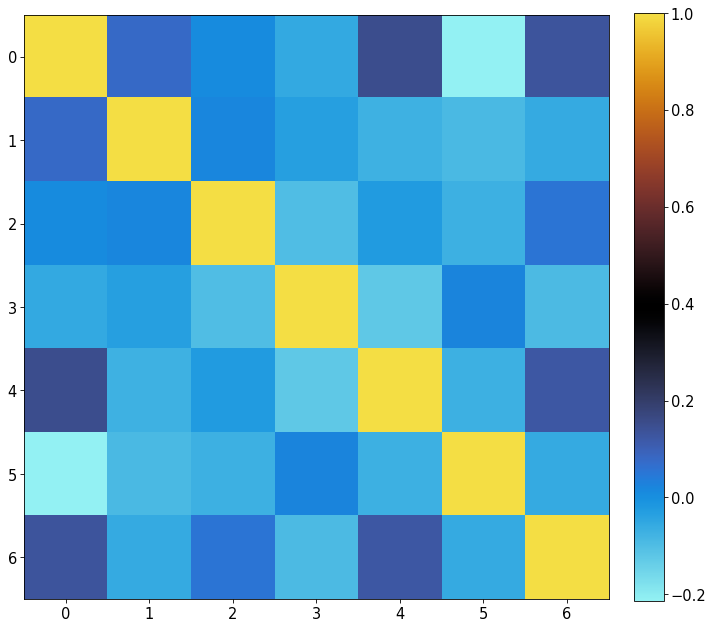

In [7]:
R = np.corrcoef(A_, rowvar=False)
args.cmap = cmr.iceburn
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(11, 11), dpi=75)
ax = axs
im = ax.imshow(R, cmap=args.cmap) #, vmin=-1, vmax=1)
ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

In [8]:
# reconstruction accuracy
ts_ = ica.inverse_transform(S_)
ts - ts_

array([[  28.09840977,   88.53028333,   35.05432153, ...,   -3.50137232,
          25.14121327, -101.80146234],
       [  65.81474449, -192.48341791, -245.30380582, ...,  -38.82187922,
         176.07537288,   33.10977522],
       [  17.40842228,   22.74130935,   -7.02363677, ...,  122.50076592,
         162.17534241, -182.06429541],
       ...,
       [  52.09085319,   47.58482529,   94.36073447, ...,   61.69078133,
          43.26963589,   27.79511646],
       [ 138.94990001,   22.38216925,   59.61019169, ..., -109.06182015,
         -64.31190608,  110.50979772],
       [ -32.10380056,   32.9902127 ,   51.96111116, ...,  108.63442979,
         -16.69393823,  185.17558894]])

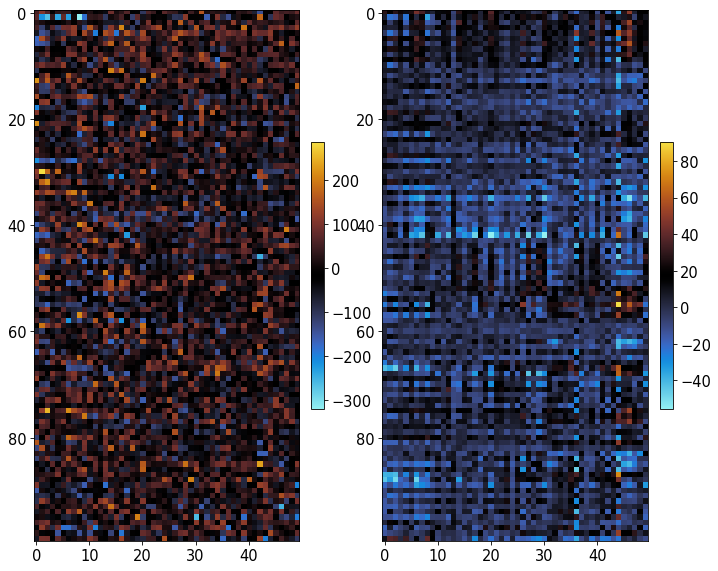

In [9]:
a = ts[:100, :50]
b = ts_[:100, :50]
args.cmap = cmr.iceburn
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(11, 11), dpi=75)
ax = axs[0]
im = ax.imshow(a, cmap=args.cmap) #, vmin=-1, vmax=1)
ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
ax = axs[1]
im = ax.imshow(b, cmap=args.cmap) #, vmin=-1, vmax=1)
ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)